## Jon intro to python, lesson 3 (9/17/17)

### in lesson two, we got up to concatenating dataframes; let's start with a  quick review of the last session, then move on to the remainder of the notebook
___

### importing pandas:

In [76]:
import pandas as pd
import numpy as np

### creating a dataframe:

Note: dataframes form the basic building block of pandas, an easy to use, intuitive, and powerful data analysis structure. Much like dataframes in R/Rstudio, pandas datasets are "tidy data": Each variables is saved in a column, and each observation is saved in a row. Tidy datasets preserve observations as you manipulate variables.

In [77]:
# specify values for each column:
df = pd.DataFrame(
    {'a':[4,5,6],
    'b':[7,8,9],
    'c':[10,11,12],},
index = [1,2,3])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [78]:
# specify values for each row:
df = pd.DataFrame(
[[4,5,6],
[7,8,9],
[10,11,12]],
index = [1,2,3],
columns = ['column1', 'b', '3'])
df

,column1,b,3
1,4,5,6
2,7,8,9
3,10,11,12


### Indexing in pandas:

Here we want to learn how to subset rows or columns.

In [79]:
# selecting a specific column:
#df['column1']

# alternatively:

df.column1

# operations with selected data?

sum(df.column1)
# selecting multiple columns?

df[['3', 'column1']]
# list all columns names?

df

,column1,b,3
1,4,5,6
2,7,8,9
3,10,11,12


In [80]:
# selecting a specific row (via index):
df.iloc[1]

# selecting multiple?

df.iloc[1:3]

# operations with selected data?
sum(df.iloc[1])

24

### Let's create a second dataframe, and see how to append them together:

In [83]:
df2 = pd.DataFrame(
[[np.nan,14,15],
[16,np.nan,18],
[19,20,np.nan]],
index = [1,2,3],
columns = ['d', 'e', 'f'])

df2

,d,e,f
1,NaN,14.0,15.0
2,16.0,NaN,18.0
3,19.0,20.0,NaN


In [84]:
# adding a column from df2 to df1:

df['newcol'] = df2['f']
df

,column1,b,3,newcol
1,4,5,6,15.0
2,7,8,9,18.0
3,10,11,12,NaN


In [85]:
# adding a calculated column:

df['calc_col'] = df['column1']*df['b']
df

# or:

df['calc_col'] = df.column1*df.b
df

,column1,b,3,newcol,calc_col
1,4,5,6,15.0,20
2,7,8,9,18.0,56
3,10,11,12,NaN,110


### concatenating dataframes:

In [86]:
# we have two dataframes of equal size, and are adding df2 to df
df_df2_concat = pd.concat([df, df2], axis=1)
df_df2_concat

,column1,b,3,newcol,calc_col,d,e,f
1,4,5,6,15.0,20,NaN,14.0,15.0
2,7,8,9,18.0,56,16.0,NaN,18.0
3,10,11,12,NaN,110,19.0,20.0,NaN


In [87]:
# lets add df2 to the bottom of df:
df_df2_vert_concat = pd.concat([df, df2], ignore_index=True)
df_df2_vert_concat

,3,b,calc_col,column1,d,e,f,newcol
0,6.0,5.0,20.0,4.0,NaN,NaN,NaN,15.0
1,9.0,8.0,56.0,7.0,NaN,NaN,NaN,18.0
2,12.0,11.0,110.0,10.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,14.0,15.0,NaN
4,NaN,NaN,NaN,NaN,16.0,NaN,18.0,NaN
5,NaN,NaN,NaN,NaN,19.0,20.0,NaN,NaN


In [ ]:
# what if uneven?

# let's add another row to df2:

df2 = df2.append(pd.DataFrame([[5, 6, 7], [7, 8, 9]], columns=list('def')), ignore_index=True)
df2

In [ ]:
# concatenate df and df2 (uneven):


___
### Pandas can read built-in datasets from other packages or through online .csv files; let's load one and play around with the data:

In [89]:
# using sklearn:

from sklearn.datasets import load_iris
iris = load_iris()
data = iris.data
column_names = iris.feature_names
species_names = iris.target_names

iris_df = pd.DataFrame(iris.data, columns= column_names)
iris_df.head() # missing species?

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [90]:
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [91]:
# loading a dataframe from a url:
iris_df2 = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [92]:
iris_df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [135]:
# using seaborn:

import seaborn.apionly as sns
iris_df = sns.load_dataset('iris') # can also load other datasets
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Let's inspect our data:

In [97]:
iris_df.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
142,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [98]:
# print full dataframe:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [99]:
# how many observations?
num_rows = len(iris_df)
print('number of observations:', num_rows)

number of observations: 150


In [100]:
# get column names (features):
num_cols = len(iris_df.columns)
print('number of features:', num_cols)
print("features:", list(iris_df.columns))

number of features: 5
features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


### Manipulating/sorting our dataframe:

In [101]:
# unique values within a column?
num_species = iris_df['species'].nunique()
# or: num_species = len(list(iris_df['species'].unique()))
species_list = list(iris_df['species'].unique())
print('number of species:',num_species)
print('species:',species_list)

number of species: 3
species: ['setosa', 'versicolor', 'virginica']


In [102]:
# sum of a column:
sum(iris_df['sepal_length'])

876.50000000000023

In [103]:
# minimum value:
min(iris_df['sepal_length'])

4.2999999999999998

In [104]:
# maximum value:
max(iris_df['sepal_length'])

7.9000000000000004

In [105]:
# mean value (using numpy):
np.mean(iris_df['sepal_length'])

5.843333333333335

In [106]:
# subsetting data by columns:

iris_df[['sepal_length', 'sepal_width']]


,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


In [107]:
# subsetting data by rows:

# we can do this manually:

iris_df.iloc[0:10] # first 10 observations

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [108]:
# but we could also do this in a way that's a bit more useful:

# let's say we're interested in looking at all the data where
# petal_length is above a certain value:

iris_df[iris_df.petal_length > 5.5]

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica


In [109]:
# how about multiple criteria?

#males = df[(df[Gender]=='Male') & (df[Year]==2014)]

iris_df[(iris_df['petal_length'] > 5.5) & (iris_df['petal_width'] > 2.2)]

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
109,7.2,3.6,6.1,2.5,virginica
118,7.7,2.6,6.9,2.3,virginica
120,6.9,3.2,5.7,2.3,virginica
135,7.7,3.0,6.1,2.3,virginica
136,6.3,3.4,5.6,2.4,virginica
140,6.7,3.1,5.6,2.4,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica


In [110]:
# or what about selecting columns in a useful way?

# selecting all columns that start in a certain way:

iris_df.filter(regex='length$') # selects all rows ending in 'length'

# can do pretty much any sort of selecting w/ regular expressions

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5


In [111]:
# let's say we wanted to organize our data in a meaningful way, for example, listing low to high:

iris_df.sort_values('petal_width')

# NB: see that pandas preserves observations following the sort

,sepal_length,sepal_width,petal_length,petal_width,species
32,5.2,4.1,1.5,0.1,setosa
13,4.3,3.0,1.1,0.1,setosa
37,4.9,3.6,1.4,0.1,setosa
9,4.9,3.1,1.5,0.1,setosa
12,4.8,3.0,1.4,0.1,setosa
0,5.1,3.5,1.4,0.2,setosa
27,5.2,3.5,1.5,0.2,setosa
28,5.2,3.4,1.4,0.2,setosa
29,4.7,3.2,1.6,0.2,setosa
30,4.8,3.1,1.6,0.2,setosa


In [114]:
# what about high to low?

iris_df.sort_values('petal_width', ascending=False)

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
109,7.2,3.6,6.1,2.5,virginica
144,6.7,3.3,5.7,2.5,virginica
114,5.8,2.8,5.1,2.4,virginica
140,6.7,3.1,5.6,2.4,virginica
136,6.3,3.4,5.6,2.4,virginica
148,6.2,3.4,5.4,2.3,virginica
115,6.4,3.2,5.3,2.3,virginica
145,6.7,3.0,5.2,2.3,virginica
143,6.8,3.2,5.9,2.3,virginica


In [116]:
# review adding a column:

iris_df['new_col'] = iris_df['petal_length']*iris_df['petal_length']

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,new_col
0,5.1,3.5,1.4,0.2,setosa,1.96
1,4.9,3.0,1.4,0.2,setosa,1.96
2,4.7,3.2,1.3,0.2,setosa,1.69
3,4.6,3.1,1.5,0.2,setosa,2.25
4,5.0,3.6,1.4,0.2,setosa,1.96


In [117]:
# now let's drop a column:

# df.drop(['length', 'height'], axis=1)
iris_df.drop(['new_col'], axis=1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### Let's look at some summary statistics:

In [118]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,new_col
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,17.218067
std,0.828066,0.435866,1.765298,0.762238,12.627044
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,2.560000
50%,5.800000,3.000000,4.350000,1.300000,18.925000
75%,6.400000,3.300000,5.100000,1.800000,26.010000
max,7.900000,4.400000,6.900000,2.500000,47.610000


In [121]:
# but what if we're interested in looking at means (or anything else)
# by a meaningful feature?

# grouping data:

# let's say we want to quickly look at the mean of each feature BY each species:

iris_df.groupby(by='species').mean()

,sepal_length,sepal_width,petal_length,petal_width,new_col
species,,,,,
setosa,5.006,3.428,1.462,0.246,2.1670
versicolor,5.936,2.770,4.260,1.326,18.3640
virginica,6.588,2.974,5.552,2.026,31.1232


In [122]:
# not as helpful, but an example of grouping by multiple columns:

iris_df.groupby(['sepal_length', 'sepal_width']).mean()

petal_length  petal_width    new_col
sepal_length sepal_width                                      
4.3          3.0              1.100000     0.100000   1.210000
4.4          2.9              1.400000     0.200000   1.960000
             3.0              1.300000     0.200000   1.690000
             3.2              1.300000     0.200000   1.690000
4.5          2.3              1.300000     0.300000   1.690000
4.6          3.1              1.500000     0.200000   2.250000
             3.2              1.400000     0.200000   1.960000
             3.4              1.400000     0.300000   1.960000
             3.6              1.000000     0.200000   1.000000
4.7          3.2              1.450000     0.200000   2.125000
4.8          3.0              1.400000     0.200000   1.960000
             3.1              1.600000     0.200000   2.560000
             3.4              1.750000     0.200000   3.085000
4.9          2.4              3.300000     1.000000  10.890000
             2.5              4.500000     1.700000  20.250000
             3.0              1.400000     0.200000   1.960000
             3.1              1.500000     0.150000   2.250000
             3.6              1.400000     0.100000   1.960000
5.0          2.0              3.500000     1.000000  12.250000
             2.3              3.300000     1.000000  10.890000
             3.0              1.600000     0.200000   2.560000
             3.2              1.200000     0.200000   1.440000
             3.3              1.400000     0.200000   1.960000
             3.4              1.550000     0.300000   2.405000
             3.5              1.450000     0.450000   2.125000
             3.6              1.400000     0.200000   1.960000
5.1          2.5              3.000000     1.100000   9.000000
             3.3              1.700000     0.500000   2.890000
             3.4              1.500000     0.200000   2.250000
             3.5              1.400000     0.250000   1.960000
...                                ...          ...        ...
6.4          2.9              4.300000     1.300000  18.490000
             3.1              5.500000     1.800000  30.250000
             3.2              4.900000     1.900000  24.170000
6.5          2.8              4.600000     1.500000  21.160000
             3.0              5.500000     2.000000  30.310000
             3.2              5.100000     2.000000  26.010000
6.6          2.9              4.600000     1.300000  21.160000
             3.0              4.400000     1.400000  19.360000
6.7          2.5              5.800000     1.800000  33.640000
             3.0              5.100000     2.000000  26.020000
             3.1              4.900000     1.766667  24.270000
             3.3              5.700000     2.300000  32.490000
6.8          2.8              4.800000     1.400000  23.040000
             3.0              5.500000     2.100000  30.250000
             3.2              5.900000     2.300000  34.810000
6.9          3.1              5.133333     1.966667  26.393333
             3.2              5.700000     2.300000  32.490000
7.0          3.2              4.700000     1.400000  22.090000
7.1          3.0              5.900000     2.100000  34.810000
7.2          3.0              5.800000     1.600000  33.640000
             3.2              6.000000     1.800000  36.000000
             3.6              6.100000     2.500000  37.210000
7.3          2.9              6.300000     1.800000  39.690000
7.4          2.8              6.100000     1.900000  37.210000
7.6          3.0              6.600000     2.100000  43.560000
7.7          2.6              6.900000     2.300000  47.610000
             2.8              6.700000     2.000000  44.890000
             3.0              6.100000     2.300000  37.210000
             3.8              6.700000     2.200000  44.890000
7.9          3.8              6.400000     2.000000  40.960000

[117 rows x 3 columns]

### Exporting data:

In [132]:
# let's export our dataframe to a .csv so we can load it later:

file_name = 'iris_df_091717.csv'

iris_df.to_csv(file_name)

In [127]:
# test out loading the file we just made:

df = pd.read_csv(file_name)
df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species,new_col
0,0,5.1,3.5,1.4,0.2,setosa,1.96
1,1,4.9,3.0,1.4,0.2,setosa,1.96
2,2,4.7,3.2,1.3,0.2,setosa,1.69
3,3,4.6,3.1,1.5,0.2,setosa,2.25
4,4,5.0,3.6,1.4,0.2,setosa,1.96


### Plotting:

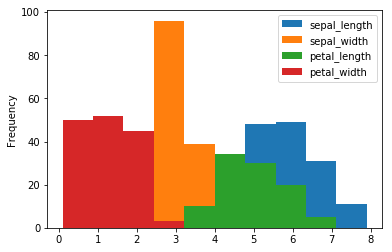

In [136]:
# let's make a histogram:

# allows jupyter to show plots within our notebook:
%matplotlib inline 

iris_df.plot.hist()

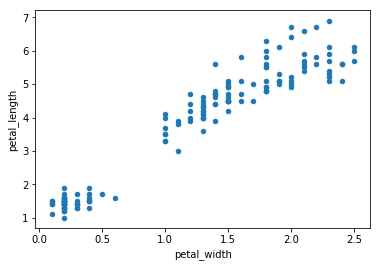

In [137]:
iris_df.plot.scatter(x='petal_width', y='petal_length')

In [ ]:
import matplotlib.pyplot as plt

petal_width_means = iris_df.groupby(by='species').mean()['petal_width']
bar_means = list(petal_width_means)
bar_names = petal_width_means.index.tolist()
bar_names

# Create the x position of the bars
x_pos = list(range(len(bar_names)))

plt.bar(x_pos,
       bar_means,
       bar_names,
       color='#FFC222')